In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML folder/winner.csv")

In [ ]:
X = df.iloc[:,2:6].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
residual = y_test - y_pred

model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.6096606185655837


### **Linearity**

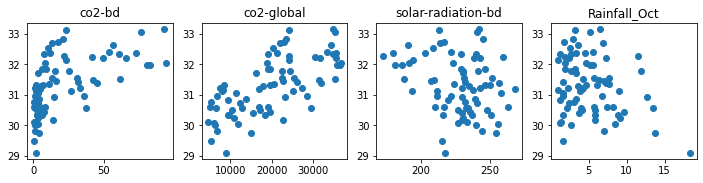

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(df['co2-bd'], df['Temperature'])
ax1.set_title("co2-bd")

ax2.scatter(df['co2-global'], df['Temperature'])
ax2.set_title("co2-global")
              
ax3.scatter(df['Radiation'], df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(df['Rainfall_Oct'], df['Temperature'])
ax4.set_title("Rainfall_Oct")
plt.show()

### **No heteroscedasticity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


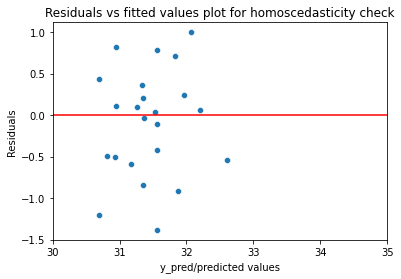

In [ ]:
p = sns.scatterplot(y_pred,residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
plt.xlim(30,35)
p = sns.lineplot([30,35],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# **Goldfeld Quandt Test**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual,X_test)
lzip(name, test)

[('F statistic', 2.357257005877862), ('p-value', 0.12634283257152507)]

## Normality of **errors**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


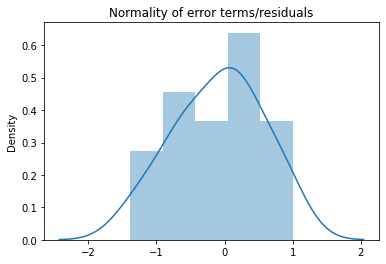

In [ ]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')

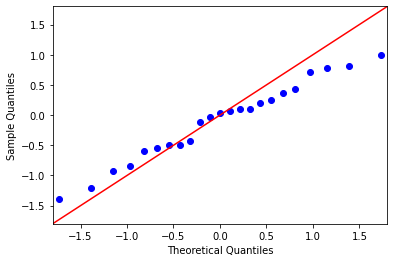

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(residual, line='45')
plt.show()

# No autocorrelation of residuals

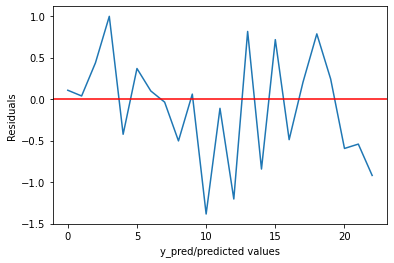

In [ ]:
plt.plot(residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(y = 0.0, color = 'r', linestyle = '-')

# To ensure the absence of autocorrelation we use Ljungbox test

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residual , lags = 10)[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.010177737093140984

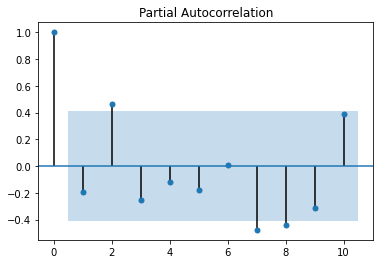

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residual, lags=10)
plt.show()

# No multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [ ]:
pd.DataFrame({'vif': vif}, index=df.columns[2:6]).T

,co2-bd,co2-global,Radiation,Rainfall_Oct
vif,8.477154,21.87815,8.84422,3.003091


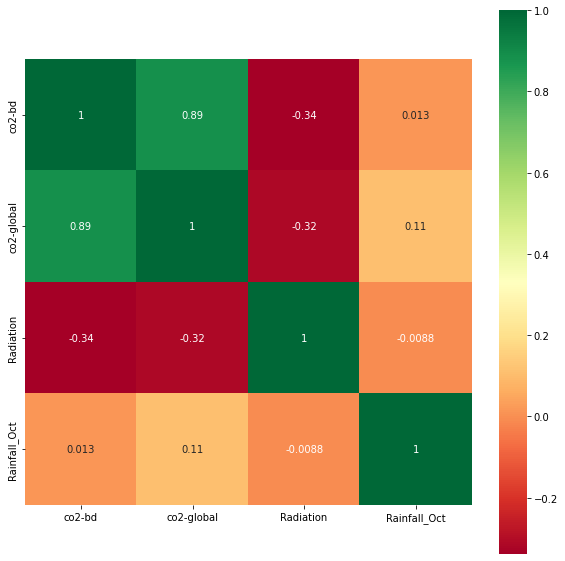

In [ ]:
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.iloc[:,2:6].corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap


In [ ]:
df_scaled = df.copy()
col_names = ['co2-bd', 'co2-global','Radiation','Rainfall_Oct']
features = df_scaled[col_names]

In [ ]:
import pandas
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     27.33
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.12e-13
Time:                        11:40:32   Log-Likelihood:                -65.624
No. Observations:                  75   AIC:                             141.2
Df Residuals:                      70   BIC:                             152.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8766      0.870     35.476      0.0

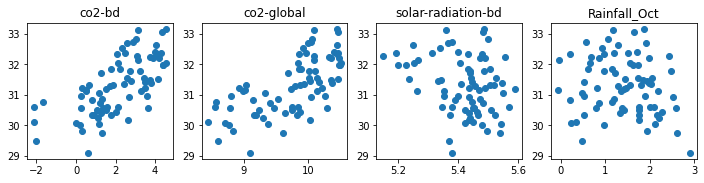

In [ ]:
#log transformation
df_t = np.log(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

l1 = df_t[:, 0]
l2 = df_t[:, 1]
l3 = df_t[:, 2]
l4 = df_t[:, 3]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(l1, df['Temperature'])
ax1.set_title("co2-bd")

ax2.scatter(l2, df['Temperature'])
ax2.set_title("co2-global")
              
ax3.scatter(l3, df['Temperature'])
ax3.set_title("solar-radiation-bd")

ax4.scatter(l4, df['Temperature'])
ax4.set_title("Rainfall_Oct")
plt.show()

In [ ]:
import pandas
import statsmodels.api as sm

df_t = np.sqrt(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     27.00
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.45e-13
Time:                        11:40:33   Log-Likelihood:                -65.908
No. Observations:                  75   AIC:                             141.8
Df Residuals:                      70   BIC:                             153.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8890      1.684     18.348      0.0

In [ ]:
import pandas
import statsmodels.api as sm

df_t = np.cbrt(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     26.60
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.98e-13
Time:                        11:40:33   Log-Likelihood:                -66.243
No. Observations:                  75   AIC:                             142.5
Df Residuals:                      70   BIC:                             154.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0283      2.509     12.367      0.0

In [ ]:
import pandas
import statsmodels.api as sm

df_t = np.log(df.iloc[:,2:6].values)
x_t = df_t[:, 0:4]

X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.14e-13
Time:                        11:40:33   Log-Likelihood:                -67.645
No. Observations:                  75   AIC:                             145.3
Df Residuals:                      70   BIC:                             156.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1054      6.216      4.521      0.0

In [ ]:
df.head()

,country,year,co2-bd,co2-global,Radiation,Rainfall_Oct,Temperature
0,Bangladesh,1946,0.117,4633.477,233.32,1.41144,30.11
1,Bangladesh,1947,0.121,5130.186,217.01,5.77714,30.61
2,Bangladesh,1948,0.134,5401.115,214.89,1.62988,29.49
3,Bangladesh,1949,0.190,5243.103,232.08,3.14604,30.76
4,Bangladesh,1950,0.993,6003.238,226.68,1.26439,30.09


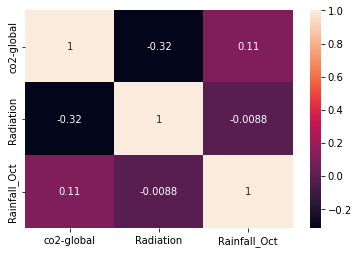

In [ ]:
sns.heatmap(df.iloc[:,3:6].corr(),annot=True)

In [ ]:
#linear regression
X = df.iloc[:,2:6].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
residual = y_test - y_pred

model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.6096606185655837


In [ ]:
# co2_bd * co2_global
#df2['co2_product'] = df.apply(lambda row: (row.co2_world*row.co2_bd), axis=1)
#df2[['Temperature','co2_product']]=df[['co2_product','Temperature']]
#df2 = df.rename({'Temperature': 'co2_product', 'co2_product': 'Temperature'}, axis=1)  # new method
#df2.drop(['co2-ratio'], axis=1, inplace=True)

# After log transformation

In [ ]:
import pandas
import statsmodels.api as sm
X = sm.add_constant(x_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.14e-13
Time:                        11:55:15   Log-Likelihood:                -67.645
No. Observations:                  75   AIC:                             145.3
Df Residuals:                      70   BIC:                             156.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1054      6.216      4.521      0.0

In [ ]:
df.head()

,country,year,co2_bd,co2_world,Radiation,Rainfall_Oct,Temperature
0,Bangladesh,1946,0.117,4633.477,233.32,1.41144,30.11
1,Bangladesh,1947,0.121,5130.186,217.01,5.77714,30.61
2,Bangladesh,1948,0.134,5401.115,214.89,1.62988,29.49
3,Bangladesh,1949,0.190,5243.103,232.08,3.14604,30.76
4,Bangladesh,1950,0.993,6003.238,226.68,1.26439,30.09


In [ ]:
#log transformation on CO2_world
df['co2_log'] = df.apply(lambda row: np.log(row.co2_world), axis=1)
df[['Temperature','co2_log']]=df[['co2_log','Temperature']]
df = df.rename({'Temperature': 'co2_log', 'co2_log': 'Temperature'}, axis=1)  # new method
#df.drop(['co2-ratio'], axis=1, inplace=True)

AttributeError: ignored

In [ ]:
df.head()

,country,year,co2-bd,co2-global,Radiation,Rainfall_Oct,Temperature
0,Bangladesh,1946,0.117,4633.477,233.32,1.41144,30.11
1,Bangladesh,1947,0.121,5130.186,217.01,5.77714,30.61
2,Bangladesh,1948,0.134,5401.115,214.89,1.62988,29.49
3,Bangladesh,1949,0.190,5243.103,232.08,3.14604,30.76
4,Bangladesh,1950,0.993,6003.238,226.68,1.26439,30.09


In [10]:
#after log transformation

import pandas
import statsmodels.api as sm

#df_t = np.log(df.iloc[:,2:6].values)
df_t = df[['Radiation','Rainfall_Oct','co2_log']]
#x_t = df_t[:, 0:4]

X = sm.add_constant(df_t)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

KeyError: ignored